### Problem Statement:
- The CarDekho company maintains a database of the cars sold through their platform. 
- The data represents the cars sold by Car Dekho and the car related features. 
- We have to build a linear regression model to predict the Selling price of the car. 
- Calculate all the error metrics and diagnostic plots to check the regression result. 
- The dataset contains data for around 301 cars sold by CarDekho.

### Data Description:
- Car_Name: Name of the cars.
- Year: Year of the car when it was bought.
- Selling_Price: Price at which the car is being sold.
- Present_Price: Current ex-showroom price of the car.
- Kms_Driven: Distance completed by the car in km.
- Fuel_Type: Fuel type of the car.
- Seller_Type: Tells if a Seller is Individual or a Dealer.
- Transmission: Gear transmission of the car (Automatic/Manual).
- Owner: Number of previous owners of the car.

### Tasks/Activities List:
- Exploratory Data Analysis (EDA) - Data quality check, treat the missing values, etc if any.
- Transform the categorical data.
- Apply the Multiple Linear Regression model
- Print the model results


### Importing the libraries required for data analysis. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os 

### Load data into Pandas Dataframe

In [2]:
data = pd.read_csv('D:\Data Sciences\ML-LinearRegression\car data.csv')

### Understading Data

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
len(data)

301

In [6]:
print(data.columns)
len(data.columns)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


9

### Exploratory Data Analysis

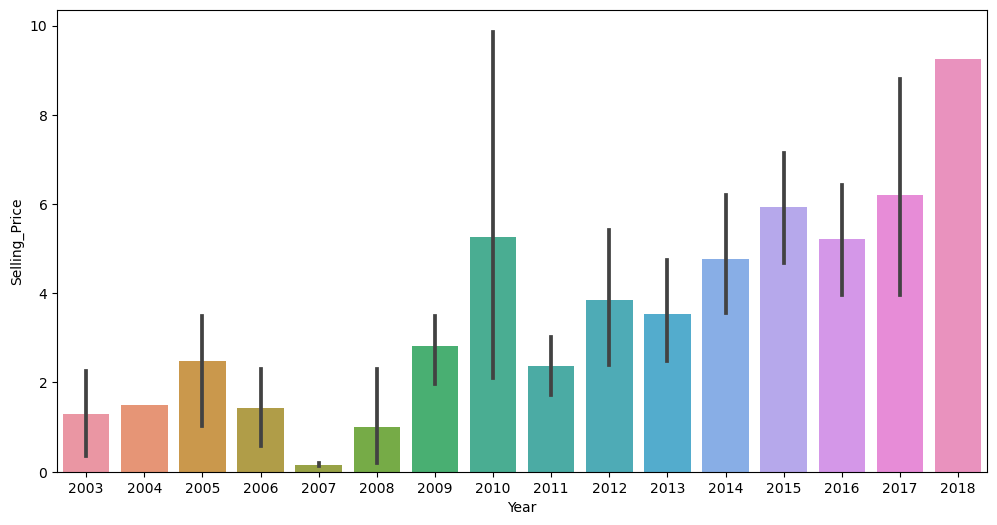

In [7]:
plt.figure(figsize=(12,6))
sns.barplot(data=data, x = 'Year',y='Selling_Price')
plt.show()

###### New cars will be having more selling price.

<Figure size 1500x600 with 0 Axes>

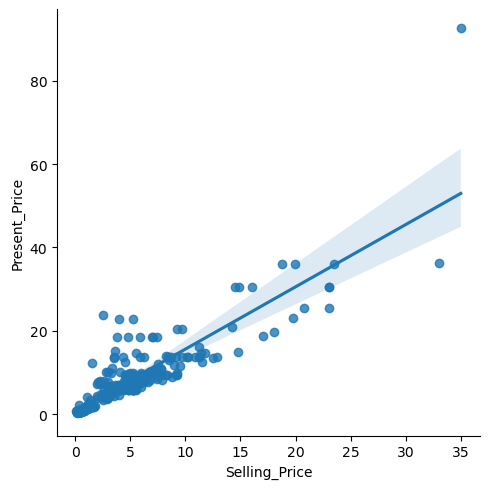

In [8]:
plt.figure(figsize=(15,6))
sns.lmplot(data=data, y = 'Present_Price',x='Selling_Price')
plt.show()

###### Selling price and present price have positive correlation

<Figure size 1200x600 with 0 Axes>

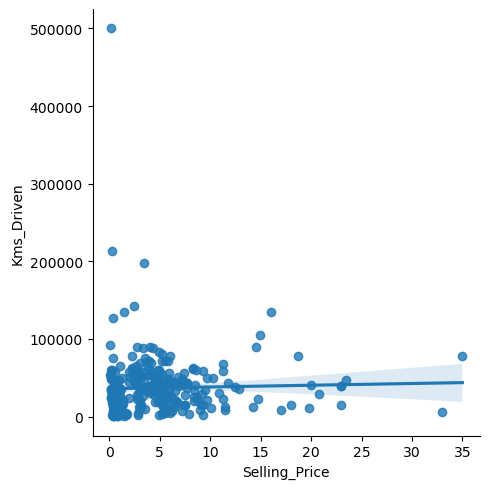

In [9]:
plt.figure(figsize=(12,6))
sns.lmplot(data=data, y = 'Kms_Driven',x='Selling_Price')
plt.show()

###### Selling price is not getting effected by Kms Driven

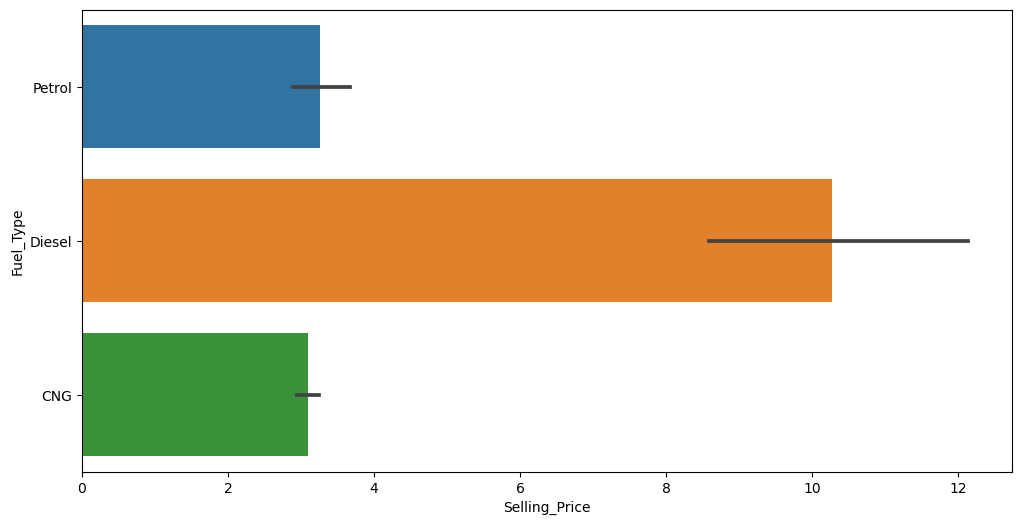

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(data=data, y = 'Fuel_Type',x='Selling_Price')
plt.show()

##### Diesel cars are more expensive than other cars

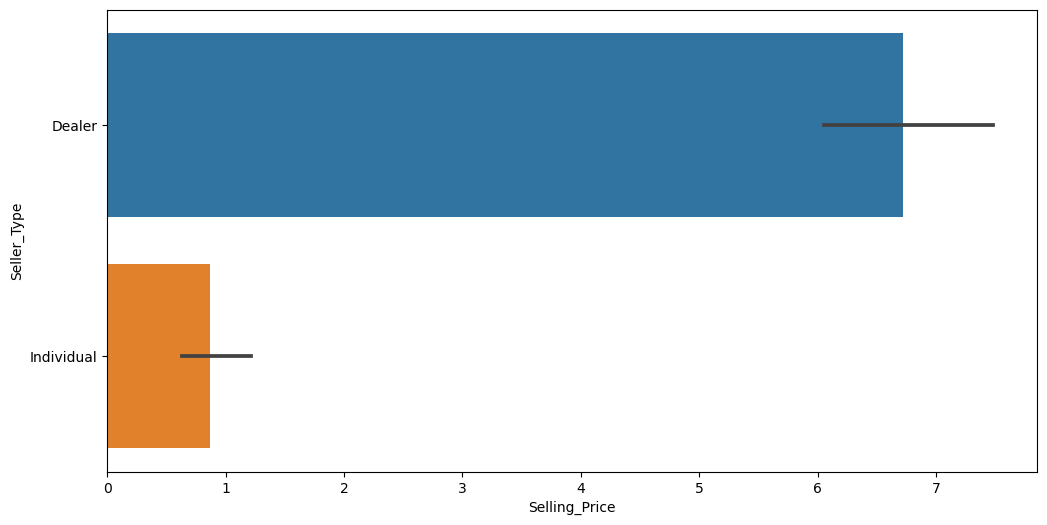

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(data=data, y = 'Seller_Type',x='Selling_Price')
plt.show()

###### Cars sold by dealers are more expensive

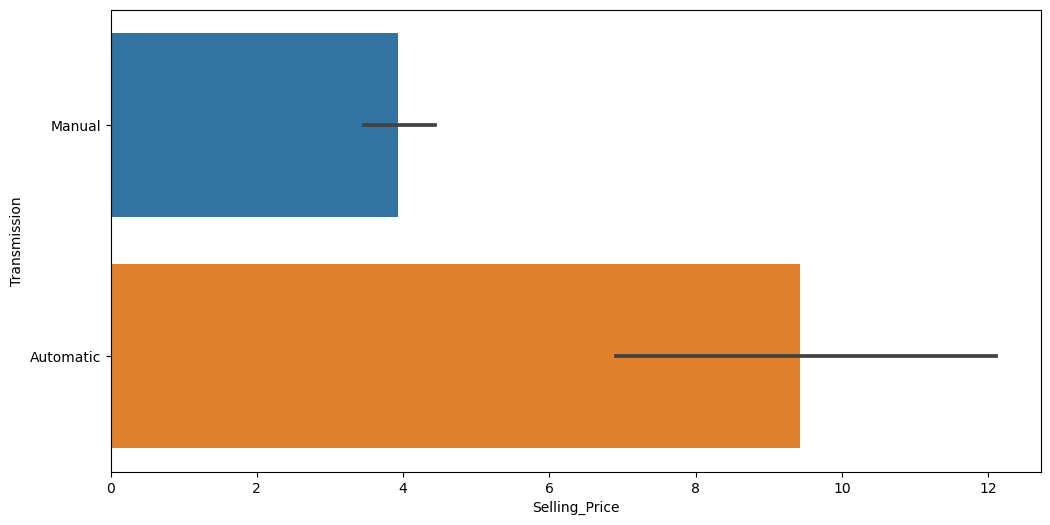

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(data=data, y = 'Transmission',x='Selling_Price')
plt.show()

###### Automatic cars are expensive

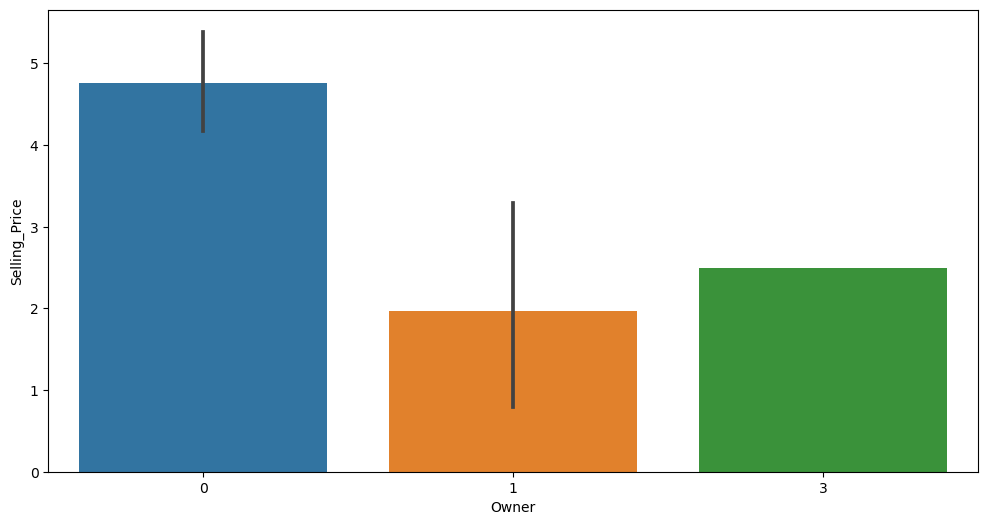

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(data=data, x = 'Owner',y='Selling_Price')
plt.show()

###### Cars with no previous owners are expensive

### Bivariate/Multi-Variate Analysis

C:\Users\supsa\AppData\Local\Temp\ipykernel_2432\1395186649.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="RdBu")


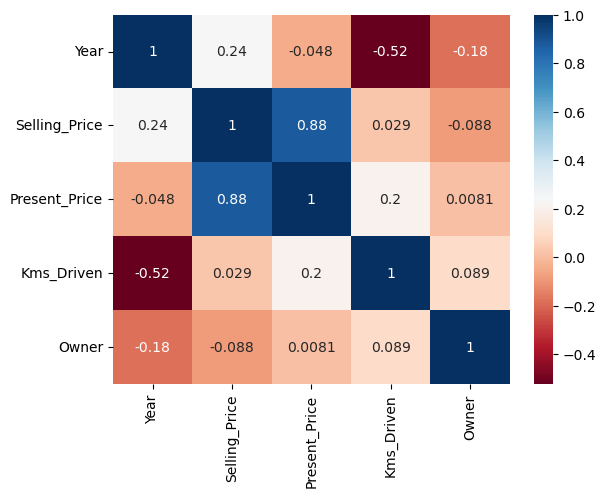

In [14]:
sns.heatmap(data.corr(), annot=True, cmap="RdBu")
plt.show()

### Outlier Removal

In [15]:
# Removal of Outliers
def remove_outliers(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1
    df_remove_outliers = dataframe[~((dataframe < (Q1 - 1.5*IQR))| (dataframe > (Q3 + 1.5*IQR))).any(axis=1)]
    return df_remove_outliers

data = remove_outliers(data)

C:\Users\supsa\AppData\Local\Temp\ipykernel_2432\2059587125.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = dataframe.quantile(0.25)
C:\Users\supsa\AppData\Local\Temp\ipykernel_2432\2059587125.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = dataframe.quantile(0.75)
C:\Users\supsa\AppData\Local\Temp\ipykernel_2432\2059587125.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_remove_outliers = dataframe[~((dataframe < (Q1 - 1.5*IQR))| (dataframe > (

In [16]:
len(data)

264

###### Checking Missing data percentage

In [17]:
data.isnull().sum()/len(data)*100

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

###### There is no missing values in data

### Transform the categorical data.

In [18]:
# Segregating the numerical and categorical columns

def data_type(data):
    
    numerical = []
    categorical = []
    for i in data.columns:
        if data[i].dtype == 'int64' or data[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical


numerical, categorical = data_type(data)

In [19]:
print(numerical)
print(categorical)

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']
['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']


In [20]:
# Identifying the binary columns
def binary_columns(df):
    
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(data)

In [21]:
# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]

def encoding(data, categorical):

    for cat in categorical:
        data[cat] = data[cat].astype('category')
        data[cat] = data[cat].cat.codes
    return data

data = encoding(data, categorical)

In [22]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,81,2014,3.35,5.59,27000,2,0,1,0
1,84,2013,4.75,9.54,43000,1,0,1,0
2,61,2017,7.25,9.85,6900,2,0,1,0
3,87,2011,2.85,4.15,5200,2,0,1,0
4,83,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,62,2016,9.50,11.60,33988,1,0,1,0
297,60,2015,4.00,5.90,60000,2,0,1,0
298,62,2009,3.35,11.00,87934,2,0,1,0
299,62,2017,11.50,12.50,9000,1,0,1,0


### Dividing data into training and testing data

In [23]:
x = data.iloc[:,[0,3,4,5,6,7,8]].values

In [24]:
y=data.iloc[:,2].values

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

### Multiple linear regression on the data

In [26]:
from sklearn.linear_model import LinearRegression

# Fitting the model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# R^2 for the model
regressor_R2 = regressor.score(x_train, y_train)
print('R^2: {0}'.format(regressor_R2))

R^2: 0.8471719207195072


In [27]:
y_pred = regressor.predict(x_test)

### Model Performance

In [28]:
class Model_Performance:
    def __init__(self,actual,predicted,count):
        self.actual = actual
        self.predicted = predicted
        self.count = count
        
    def mape(self):
        return (np.mean(np.abs((self.actual - self.predicted) / self.actual)))*(1/self.count)
    
    def mae(self):
        return (np.mean(np.abs((self.actual - self.predicted))))*(1/self.count)
    
    def mse(self):
        return (np.mean(np.abs((self.actual - self.predicted))))**2*(1/self.count)
    
    def rmse(self):
        return np.sqrt((np.mean(np.abs((self.actual - self.predicted))))**2*(1/self.count))

In [29]:
mp = Model_Performance(y_test,y_pred,len(y_test))
regression = {'MODEL NAME':['Regression_Ini'],'MAPE':[mp.mape()],'MAE':[mp.mae()],'MSE':[mp.mse()], 'RMSE':[mp.rmse()]}

In [30]:
regression

{'MODEL NAME': ['Regression_Ini'],
 'MAPE': [0.010998878475679486],
 'MAE': [0.020305377563081484],
 'MSE': [0.021852342972902526],
 'RMSE': [0.14782538000256426]}

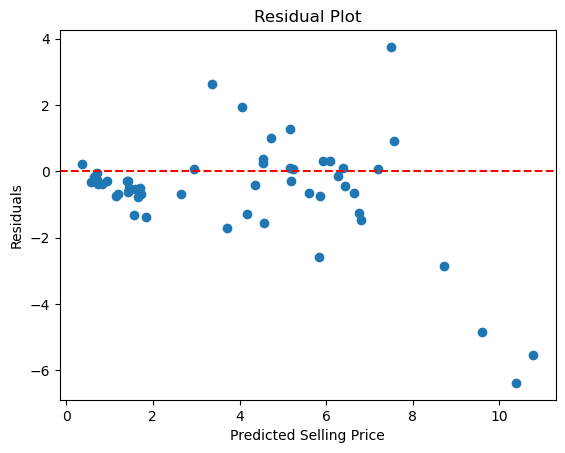

In [31]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Selling Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()